<a href="https://colab.research.google.com/github/acruz050/CS6647/blob/main/CruzHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

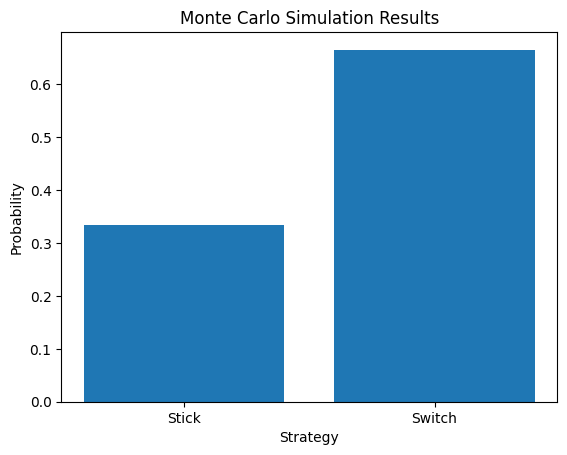

In [2]:
#Suppose you have three bills. Two are $10 bills and the other one is a $100 bill. Your friend
#puts each bill in a box. So one box has $100, and the other two boxes have $10 each. You pick
#a box, let's say box 1, then your friend who knows what's inside the boxes, opens another box,
#say box 3, which has a $10 bill. Do you want to stick your choice or switch to another box in
#order to get the $100 bill?  ( if the 100 is inside box 2 the friend must open box 3, but if the
#100 is inside box 1 the friend can open either box 2 or 3.)
#Produce the probability numbers and a graph to justify your choice to stick or switch.

import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_simulations):
    stick_wins = 0
    switch_wins = 0

    for _ in range(num_simulations):
        # Randomly assign the $100 bill to a box (0, 1, or 2)
        correct_box = np.random.randint(0, 3)

        # Choose a box initially
        initial_choice = np.random.randint(0, 3)

        # Determine the box the friend will open
        possible_boxes = [0, 1, 2]
        possible_boxes.remove(initial_choice)

        if initial_choice == correct_box:
            possible_boxes.remove(np.random.choice(possible_boxes))
        else:
            possible_boxes.remove(correct_box)

        # Friend opens one of the boxes with $10 bill
        opened_box = possible_boxes[0]

        # Determine the remaining box to switch to
        remaining_box = list(set([0, 1, 2]) - {initial_choice, opened_box})[0]

        # Check if sticking or switching would result in a win
        if initial_choice == correct_box:
            stick_wins += 1
        elif remaining_box == correct_box:
            switch_wins += 1

    # Calculate probabilities
    stick_prob = stick_wins / num_simulations
    switch_prob = switch_wins / num_simulations

    return stick_prob, switch_prob

# Run Monte Carlo simulation with 10,000 simulations
stick_prob, switch_prob = monte_carlo_simulation(10000)

# Visualize the results
labels = ['Stick', 'Switch']
probabilities = [stick_prob, switch_prob]

plt.bar(labels, probabilities)
plt.xlabel('Strategy')
plt.ylabel('Probability')
plt.title('Monte Carlo Simulation Results')
plt.show()


In [4]:
#Use the Monte Carlo method to get integral for
#The function to be integrated f(x) = cos(71x) + sin(13x)
#With integration limits from x = 0 to x = 1

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def monte_carlo_integration(f, lower_limit, upper_limit, num_samples):
    # Generate random x-coordinates within the integration limits
    random_x = np.random.uniform(lower_limit, upper_limit, num_samples)

    # Evaluate the function at the random x-coordinates
    function_values = np.vectorize(sp.lambdify(x, f))(random_x)

    # Calculate the average function value
    average_value = np.mean(function_values)

    # Calculate the interval length
    interval_length = upper_limit - lower_limit

    # Calculate the integral approximation
    integral_approximation = interval_length * average_value

    return integral_approximation

# Define the symbolic variable
x = sp.symbols('x')

# Define the function to be integrated
f = sp.cos(71 * x) + sp.sin(13 * x)

# Specify the integration limits
lower_limit = 0
upper_limit = 1

# Set the number of samples (larger number gives a more accurate approximation)
num_samples = 10**6

# Perform the Monte Carlo integration
integral_approximation = monte_carlo_integration(f, lower_limit, upper_limit, num_samples)

# Analytically calculate the exact integral using sympy
exact_integral = sp.integrate(f, (x, lower_limit, upper_limit))

print("Approximate integral:", integral_approximation)
print("Exact integral:", exact_integral)


Approximate integral: 0.01919292888435491
Exact integral: -cos(13)/13 + sin(71)/71 + 1/13
